# Synthetic data generation for different scenarios

In [1]:
folder_date = "2025-04-17"

In [30]:
import os
import numpy as np
import pandas as pd
import anndata

In [3]:
# For reproducibility
np.random.seed(42)

In [29]:
results_dir = f"../results/{folder_date}/out"

results_dir

'../results/2025-04-17/out'

In [5]:
def convert_into_anndata(df):
    """
    Convert the DataFrame into an AnnData object.
    """

    gene_cols = [col for col in df.columns if col.startswith('gene_')]
    meta_cols = [col for col in df.columns if not col.startswith('gene_')]

    # Extract the gene expression matrix
    X = df[gene_cols].values

    # Create observation meta data (cells)
    obs = df[meta_cols].copy()
    obs.index = df['cell_id']

    # Create variable meta data (genes)
    var = pd.DataFrame(index=[col for col in gene_cols])

    # Create the AnnData object
    adata = anndata.AnnData(X=X, obs=obs, var=var)

    return adata

### Scenario 01: Perfect Batch Integration

- All cell types are evenly distributed across batches
- Local distributions match global distributions perfectly

In [32]:
sc_order = "01"

In [33]:
out_dir = f"{results_dir}/{sc_order}"
os.makedirs(out_dir, exist_ok=True)
out_dir

'../results/2025-04-17/out/01'

In [17]:
n_cells = 3000
n_genes = 10000
n_batches = 2
n_celltypes = 3

In [18]:
# Create balanced batches and cell types
n_cells_per_batch = n_cells // n_batches

n_cells_per_batch

1500

In [19]:
batches = np.repeat(np.arange(1, n_batches+1), n_cells_per_batch)

batches

array([1, 1, 1, ..., 2, 2, 2])

In [20]:
cells_per_type = n_cells // n_celltypes

cells_per_type

1000

In [21]:
cell_types = np.repeat(np.arange(1, n_celltypes+1), cells_per_type)

cell_types

array([1, 1, 1, ..., 3, 3, 3])

In [22]:
# Shuffle cell types to ensure even distribution across batches
np.random.shuffle(cell_types)

cell_types

array([1, 2, 2, ..., 3, 3, 3])

In [23]:
# Generate expression data
expression = np.zeros((n_cells, n_genes))

expression.shape

(3000, 10000)

In [24]:
# Generate distinct expression profiles for each cell type
for ct in range(1, n_celltypes + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Generate base profile for this cell type
    base_profile = np.random.normal(loc=ct, scale=0.5, size=n_genes)   # n_genes points from N(ct, 0.5^2)

    # Add some noise to each cell
    for i in idx:
        noise = np.random.normal(loc=0, scale=0.2, size=n_genes)  # n_genes points from N(0, 0.2^2)
        expression[i] = base_profile + noise


In [25]:
# Create a DataFrame for the expression data
df = pd.DataFrame({
    'cell_id': [f'cell_{i}' for i in range(n_cells)],
    'Batch': [f'Batch{b}' for b in batches],
    'Group': [f'Group{ct}' for ct in cell_types]
})

df

cell_id   Batch   Group
0        cell_0  Batch1  Group1
1        cell_1  Batch1  Group2
2        cell_2  Batch1  Group2
3        cell_3  Batch1  Group2
4        cell_4  Batch1  Group1
...         ...     ...     ...
2995  cell_2995  Batch2  Group1
2996  cell_2996  Batch2  Group1
2997  cell_2997  Batch2  Group3
2998  cell_2998  Batch2  Group3
2999  cell_2999  Batch2  Group3

[3000 rows x 3 columns]

In [26]:
# Add expression data to the DataFrame
for i in range(n_genes):
    df[f'gene_{i}'] = expression[:, i]

/tmp/ipykernel_200220/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_200220/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_200220/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [27]:
df

cell_id   Batch   Group    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  Batch1  Group1  0.577357  0.658462  0.813186  0.974149   
1        cell_1  Batch1  Group2  3.059826  2.218762  2.668992  2.568933   
2        cell_2  Batch1  Group2  2.548740  1.967051  2.459359  2.329572   
3        cell_3  Batch1  Group2  2.746887  2.292276  2.650636  2.287178   
4        cell_4  Batch1  Group1  0.399573  0.163499  1.059434  0.256414   
...         ...     ...     ...       ...       ...       ...       ...   
2995  cell_2995  Batch2  Group1  0.627280  0.918066  1.161943  0.747925   
2996  cell_2996  Batch2  Group1  0.389515  0.740946  1.040551  0.458053   
2997  cell_2997  Batch2  Group3  2.696721  3.701148  3.013142  2.649537   
2998  cell_2998  Batch2  Group3  2.243034  3.609262  2.747120  2.746189   
2999  cell_2999  Batch2  Group3  2.324407  4.140672  2.719781  2.879610   

        gene_4    gene_5    gene_6  ...  gene_9990  gene_9991  gene_9992  \
0     1.452859  2.065831  0.852771  ...   1.053958   0.033179   0.441126   
1     1.957134  2.837208  1.985175  ...   2.298867   2.249361   2.931981   
2     1.492054  2.845777  2.203728  ...   2.654744   1.955743   2.843862   
3     1.793340  3.022131  2.142363  ...   2.568431   1.982077   2.917744   
4     1.478572  1.824803  0.464027  ...   0.832801  -0.116531   0.968783   
...        ...       ...       ...  ...        ...        ...        ...   
2995  1.388851  2.239081  0.462069  ...   0.629684   0.141461   0.848825   
2996  1.654557  2.011517  0.725716  ...   0.838495   0.247780   0.948833   
2997  2.829720  3.403924  3.270772  ...   3.110511   3.132569   2.562694   
2998  3.177727  3.546169  3.243265  ...   3.301818   3.358778   2.589883   
2999  3.065801  3.218952  3.096375  ...   2.951326   3.121379   2.462498   

      gene_9993  gene_9994  gene_9995  gene_9996  gene_9997  gene_9998  \
0      1.745227   0.997418   0.919090   0.736345   0.517075   1.412751   
1      2.104544   1.078179   1.517888   2.110859   2.162646   1.423259   
2      2.094387   1.329059   1.309409   2.013444   2.305449   1.893628   
3      1.927446   1.237084   1.828158   2.272154   2.329600   1.451107   
4      2.029902   0.723322   0.870643   0.368712   0.624572   1.268206   
...         ...        ...        ...        ...        ...        ...   
2995   2.084260   0.869603   0.827786   0.810102   0.676110   1.669981   
2996   1.957339   1.381090   1.159681   0.766364   0.402912   2.003440   
2997   2.782113   3.702028   1.940408   3.711671   3.782397   3.383671   
2998   2.615181   3.470776   2.446497   3.275441   3.469273   3.299569   
2999   2.677372   3.642457   2.182218   3.433587   3.195495   3.205252   

      gene_9999  
0      1.485299  
1      2.073217  
2      2.390920  
3      2.174947  
4      1.004250  
...         ...  
2995   0.982373  
2996   0.906980  
2997   2.696713  
2998   2.825921  
2999   3.334236  

[3000 rows x 10003 columns]

In [28]:
adata = convert_into_anndata(df=df)

adata

AnnData object with n_obs × n_vars = 3000 × 10000
    obs: 'cell_id', 'Batch', 'Group'

In [34]:
adata.write_h5ad(f"{out_dir}/{folder_date}_sc_01.h5ad")

### Scenario 02: Complete Batch Effect

- Each cell type appears exclusively in one batch

In [149]:
n_cells = 3000
n_genes = 2000
n_batches = 3
n_celltypes = 3

In [150]:
# Assign cell types to specific batches (round-robin if more cell types than batches)
cell_type_to_batch = {ct: (ct % n_batches) for ct in range(1, n_celltypes + 1)}
cell_type_to_batch

{1: 1, 2: 2, 3: 0}

In [151]:
# Create balanced cell types
cells_per_type = n_cells // n_celltypes
cells_per_type

1000

In [152]:
cell_types = np.repeat(np.arange(1, n_celltypes + 1), cells_per_type)
cell_types

array([1, 1, 1, ..., 3, 3, 3])

In [153]:
# Assign batches based on cell types
batches = np.array([cell_type_to_batch[ct] for ct in cell_types])

batches

array([1, 1, 1, ..., 0, 0, 0])

In [154]:
unique, counts = np.unique(batches, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(1000), np.int64(1): np.int64(1000), np.int64(2): np.int64(1000)}


In [155]:
# Generate expression data
expression = np.zeros((n_cells, n_genes))
expression.shape

(3000, 2000)

In [156]:
# Generate expression profiles
for ct in range(1, n_celltypes+1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Generate base profile for this cell type
    base_profile = np.random.normal(loc=ct, scale=0.5, size=n_genes)  # n_genes points from N(ct, 0.5^2)

    # Add some noise to each cell
    for i in idx:
        noise = np.random.normal(loc=0, scale=0.2, size=n_genes)  # n_genes points from N(0, 0.2^2)
        expression[i] = base_profile + noise

# Add batch effect (shift gene expression)
for b in range(1, n_batches+1):
    batch_idx = np.where(batches == b)[0]
    batch_effect = np.random.normal(loc=b, scale=0.5, size=n_genes)  # n_genes points from N(b, 0.5^2)
    expression[batch_idx] += batch_effect


In [157]:
# Create a DataFrame for the expression data
df = pd.DataFrame({
    'cell_id': [f'cell_{i}' for i in range(n_cells)],
    'batch': [f'batch_{b}' for b in batches],
    'cell_type': [f'cell_type_{ct}' for ct in cell_types]
})

df

cell_id    batch    cell_type
0        cell_0  batch_1  cell_type_1
1        cell_1  batch_1  cell_type_1
2        cell_2  batch_1  cell_type_1
3        cell_3  batch_1  cell_type_1
4        cell_4  batch_1  cell_type_1
...         ...      ...          ...
2995  cell_2995  batch_0  cell_type_3
2996  cell_2996  batch_0  cell_type_3
2997  cell_2997  batch_0  cell_type_3
2998  cell_2998  batch_0  cell_type_3
2999  cell_2999  batch_0  cell_type_3

[3000 rows x 3 columns]

In [158]:
# Add expression data to the DataFrame
for i in range(n_genes):
    df[f'gene_{i}'] = expression[:, i]

/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [159]:
df

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  2.127915  2.775691  1.038138  0.859234   
1        cell_1  batch_1  cell_type_1  1.752104  2.833250  1.003496  0.543497   
2        cell_2  batch_1  cell_type_1  2.011213  2.850333  1.362460  0.937206   
3        cell_3  batch_1  cell_type_1  1.737880  2.692298  1.083506  0.911424   
4        cell_4  batch_1  cell_type_1  1.968596  2.602936  0.678645  1.071710   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_0  cell_type_3  2.761224  3.604133  3.004975  3.152887   
2996  cell_2996  batch_0  cell_type_3  2.924856  3.490347  3.594639  3.218849   
2997  cell_2997  batch_0  cell_type_3  2.668212  3.443939  3.587179  3.635003   
2998  cell_2998  batch_0  cell_type_3  2.763734  3.046275  3.366115  3.541370   
2999  cell_2999  batch_0  cell_type_3  2.878687  3.150504  3.578642  3.699154   

        gene_4    gene_5    gene_6  ...  gene_1990  gene_1991  gene_1992  \
0     2.001542  1.966228  1.727106  ...   3.363428   3.255919   3.721221   
1     1.613614  1.691482  2.427223  ...   2.967503   3.002902   3.270953   
2     1.627008  1.634478  1.885619  ...   3.352778   2.424020   3.717228   
3     1.883541  1.694955  2.099970  ...   2.751244   3.033224   3.299559   
4     1.439550  1.887955  2.090793  ...   3.536168   3.062998   3.183338   
...        ...       ...       ...  ...        ...        ...        ...   
2995  2.573900  3.455216  2.616383  ...   3.571701   3.033196   2.855920   
2996  2.672469  3.731764  2.439939  ...   3.586753   2.840637   3.012594   
2997  3.445019  3.236822  2.264623  ...   3.514253   2.854061   3.052480   
2998  2.523708  3.396639  2.941398  ...   3.521401   3.218312   3.185421   
2999  2.496868  3.166749  2.639493  ...   3.680345   3.118003   2.730400   

      gene_1993  gene_1994  gene_1995  gene_1996  gene_1997  gene_1998  \
0      2.507121   0.778280   3.061174   2.810658   1.455364   2.703615   
1      1.621074   0.836197   3.066623   2.642276   1.490121   2.989557   
2      2.332080   1.216052   2.995126   2.601837   1.497039   2.703736   
3      2.218739   0.813732   2.947883   2.534759   1.537920   3.075791   
4      2.026029   0.643650   3.163801   2.335576   1.391279   3.309755   
...         ...        ...        ...        ...        ...        ...   
2995   2.351732   3.427901   2.717829   2.207702   3.772832   2.973073   
2996   2.460651   3.348783   2.065856   2.360597   3.451889   3.411057   
2997   2.548886   3.099375   2.377345   2.398431   3.578972   2.807338   
2998   2.358747   3.370925   2.034682   2.376590   3.903888   3.209896   
2999   2.438936   3.706481   2.320906   2.534026   3.509624   3.217805   

      gene_1999  
0      2.066626  
1      2.206704  
2      2.555438  
3      2.166229  
4      2.244135  
...         ...  
2995   3.028016  
2996   2.780775  
2997   2.714388  
2998   2.812974  
2999   2.538873  

[3000 rows x 2003 columns]

In [160]:
df.iloc[1500]

cell_id        cell_1500
batch            batch_2
cell_type    cell_type_2
gene_0           4.35695
gene_1          3.246118
                ...     
gene_1995       3.449383
gene_1996       4.474596
gene_1997       3.316843
gene_1998       4.802775
gene_1999       3.505154
Name: 1500, Length: 2003, dtype: object

In [161]:
# Calculate UMAP embedding
embedding = calculate_umap_embedding(df, n_genes=n_genes)

# Add embedding to DataFrame
df['umap_1'] = embedding[:, 0]
df['umap_2'] = embedding[:, 1]

df

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_247339/3387396893.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['umap_1'] = embedding[:, 0]
/tmp/ipykernel_247339/3387396893.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['umap_2'] = embedding[:, 1]


cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  2.127915  2.775691  1.038138  0.859234   
1        cell_1  batch_1  cell_type_1  1.752104  2.833250  1.003496  0.543497   
2        cell_2  batch_1  cell_type_1  2.011213  2.850333  1.362460  0.937206   
3        cell_3  batch_1  cell_type_1  1.737880  2.692298  1.083506  0.911424   
4        cell_4  batch_1  cell_type_1  1.968596  2.602936  0.678645  1.071710   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_0  cell_type_3  2.761224  3.604133  3.004975  3.152887   
2996  cell_2996  batch_0  cell_type_3  2.924856  3.490347  3.594639  3.218849   
2997  cell_2997  batch_0  cell_type_3  2.668212  3.443939  3.587179  3.635003   
2998  cell_2998  batch_0  cell_type_3  2.763734  3.046275  3.366115  3.541370   
2999  cell_2999  batch_0  cell_type_3  2.878687  3.150504  3.578642  3.699154   

        gene_4    gene_5    gene_6  ...  gene_1992  gene_1993  gene_1994  \
0     2.001542  1.966228  1.727106  ...   3.721221   2.507121   0.778280   
1     1.613614  1.691482  2.427223  ...   3.270953   1.621074   0.836197   
2     1.627008  1.634478  1.885619  ...   3.717228   2.332080   1.216052   
3     1.883541  1.694955  2.099970  ...   3.299559   2.218739   0.813732   
4     1.439550  1.887955  2.090793  ...   3.183338   2.026029   0.643650   
...        ...       ...       ...  ...        ...        ...        ...   
2995  2.573900  3.455216  2.616383  ...   2.855920   2.351732   3.427901   
2996  2.672469  3.731764  2.439939  ...   3.012594   2.460651   3.348783   
2997  3.445019  3.236822  2.264623  ...   3.052480   2.548886   3.099375   
2998  2.523708  3.396639  2.941398  ...   3.185421   2.358747   3.370925   
2999  2.496868  3.166749  2.639493  ...   2.730400   2.438936   3.706481   

      gene_1995  gene_1996  gene_1997  gene_1998  gene_1999     umap_1  \
0      3.061174   2.810658   1.455364   2.703615   2.066626  12.909809   
1      3.066623   2.642276   1.490121   2.989557   2.206704  13.233165   
2      2.995126   2.601837   1.497039   2.703736   2.555438  12.910780   
3      2.947883   2.534759   1.537920   3.075791   2.166229  13.171564   
4      3.163801   2.335576   1.391279   3.309755   2.244135  12.465446   
...         ...        ...        ...        ...        ...        ...   
2995   2.717829   2.207702   3.772832   2.973073   3.028016  -5.610137   
2996   2.065856   2.360597   3.451889   3.411057   2.780775  -5.702802   
2997   2.377345   2.398431   3.578972   2.807338   2.714388  -4.963223   
2998   2.034682   2.376590   3.903888   3.209896   2.812974  -4.628569   
2999   2.320906   2.534026   3.509624   3.217805   2.538873  -6.232004   

        umap_2  
0    -1.305690  
1    -1.533429  
2    -1.922598  
3    -0.549053  
4    -2.006566  
...        ...  
2995  0.175850  
2996 -0.164387  
2997  1.097519  
2998  1.259840  
2999  0.747898  

[3000 rows x 2005 columns]

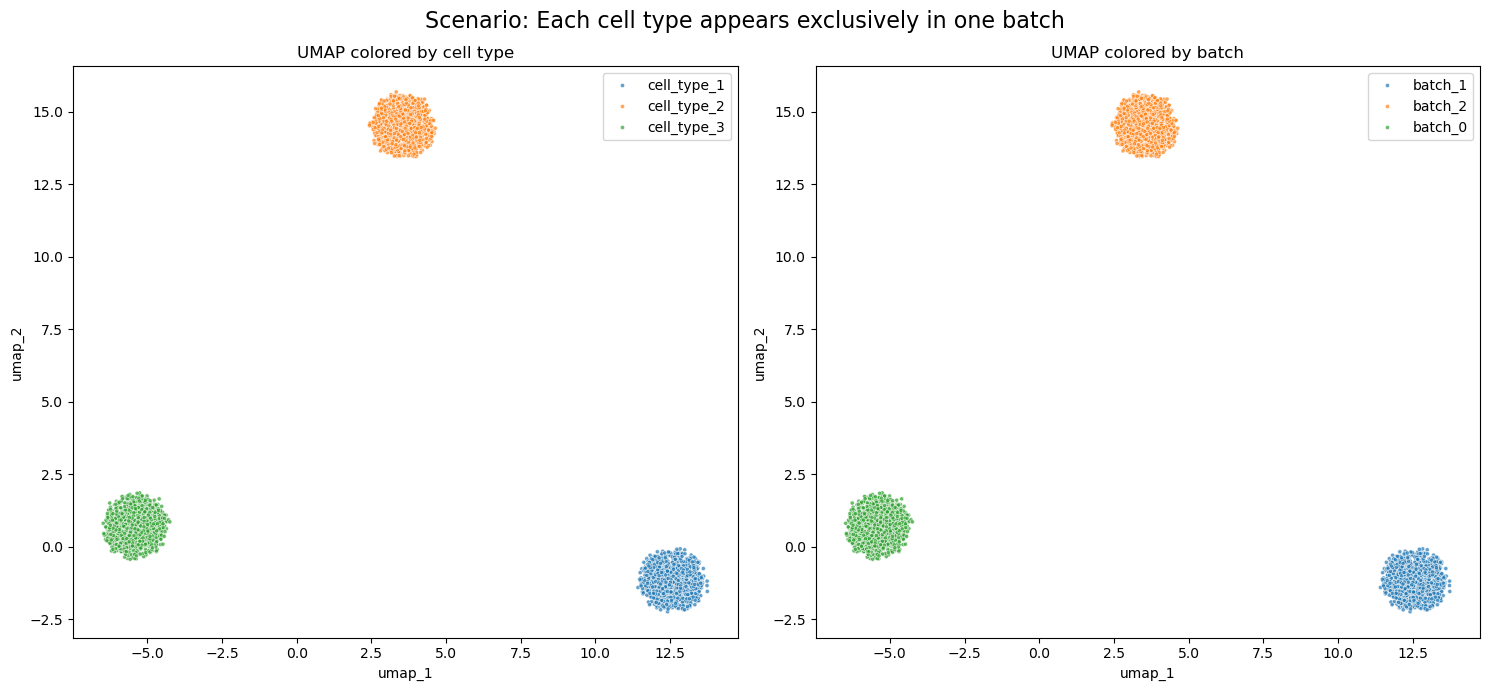

In [162]:
fig, axes = plot_scenario_plots(
    df=df,
    scenario_name='Each cell type appears exclusively in one batch'
)
plt.savefig(f"{results_dir}/{folder_date}_umap_scenario_02_each_celltype_exclusively_in_one_batch.png", dpi=300)
plt.show()

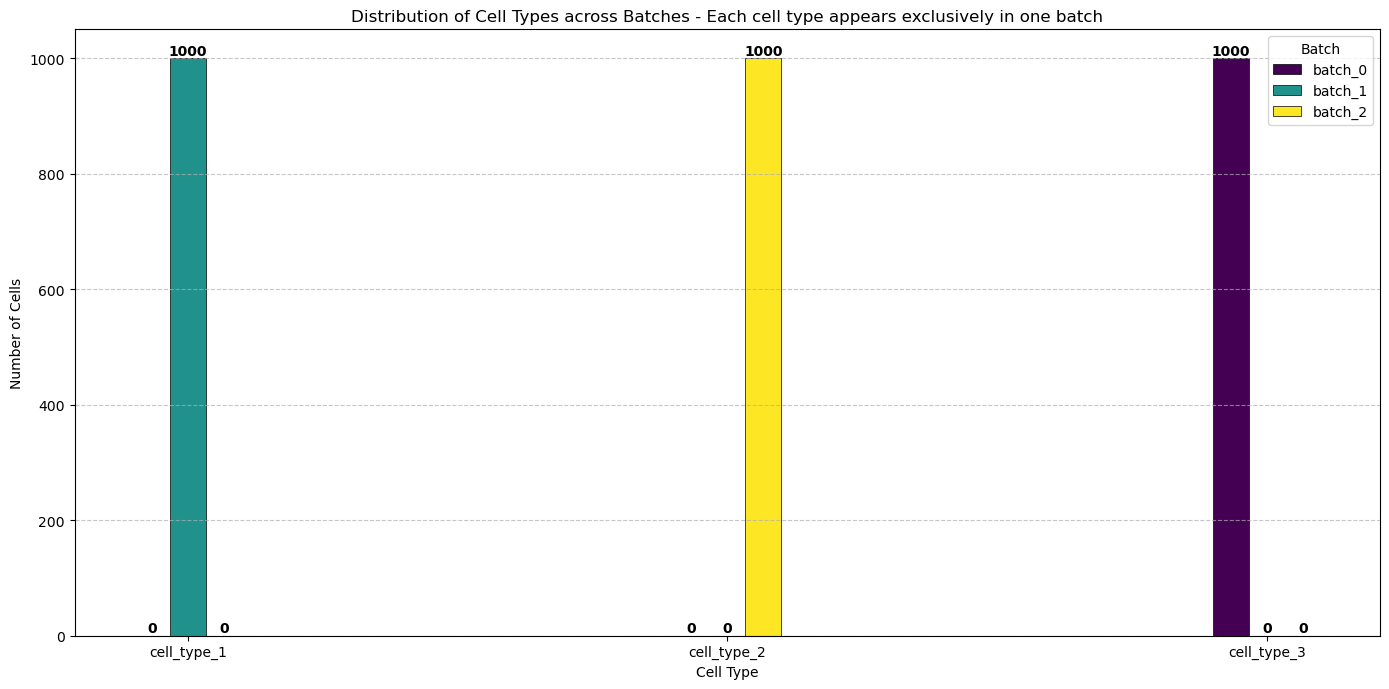

In [163]:
fig, axes = plot_cell_type_distribution(
    df=df,
    scenario_name='Each cell type appears exclusively in one batch'
)
plt.savefig(f"{results_dir}/{folder_date}_scenario_02_cell_type_distr_across_batches.png", dpi=300)
plt.show()

In [164]:
adata = convert_into_anndata(df=df)

adata

AnnData object with n_obs × n_vars = 3000 × 2000
    obs: 'cell_id', 'batch', 'cell_type', 'umap_1', 'umap_2'
    obsm: 'X_umap'

In [165]:
adata.write_h5ad(f"{results_dir}/{folder_date}_scenario_02_each_celltype_exclusively_in_one_batch.h5ad")

### Scenario 03: Each cell type appears exclusively in one batch

- batch_1 has 2 cell types while batch_0 has only 1

In [166]:
n_cells = 3000
n_genes = 2000
n_batches = 2
n_celltypes = 3

In [167]:
# Assign cell types to specific batches (round-robin if more cell types than batches)
cell_type_to_batch = {ct: (ct % n_batches) for ct in range(1, n_celltypes + 1)}
cell_type_to_batch

{1: 1, 2: 0, 3: 1}

In [168]:
# Create balanced cell types
cells_per_type = n_cells // n_celltypes
cells_per_type

1000

In [169]:
cell_types = np.repeat(np.arange(1, n_celltypes + 1), cells_per_type)
cell_types

array([1, 1, 1, ..., 3, 3, 3])

In [170]:
# Assign batches based on cell types
batches = np.array([cell_type_to_batch[ct] for ct in cell_types])

batches

array([1, 1, 1, ..., 1, 1, 1])

In [171]:
unique, counts = np.unique(batches, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(1000), np.int64(1): np.int64(2000)}


In [172]:
# Generate expression data
expression = np.zeros((n_cells, n_genes))
expression.shape

(3000, 2000)

In [173]:
# Generate expression profiles
for ct in range(1, n_celltypes+1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Generate base profile for this cell type
    base_profile = np.random.normal(loc=ct, scale=0.5, size=n_genes)  # n_genes points from N(ct, 0.5^2)

    # Add some noise to each cell
    for i in idx:
        noise = np.random.normal(loc=0, scale=0.2, size=n_genes)  # n_genes points from N(0, 0.2^2)
        expression[i] = base_profile + noise

# Add batch effect (shift gene expression)
for b in range(1, n_batches+1):
    batch_idx = np.where(batches == b)[0]
    batch_effect = np.random.normal(loc=b, scale=0.5, size=n_genes)  # n_genes points from N(b, 0.5^2)
    expression[batch_idx] += batch_effect


In [174]:
# Create a DataFrame for the expression data
df = pd.DataFrame({
    'cell_id': [f'cell_{i}' for i in range(n_cells)],
    'batch': [f'batch_{b}' for b in batches],
    'cell_type': [f'cell_type_{ct}' for ct in cell_types]
})

df

cell_id    batch    cell_type
0        cell_0  batch_1  cell_type_1
1        cell_1  batch_1  cell_type_1
2        cell_2  batch_1  cell_type_1
3        cell_3  batch_1  cell_type_1
4        cell_4  batch_1  cell_type_1
...         ...      ...          ...
2995  cell_2995  batch_1  cell_type_3
2996  cell_2996  batch_1  cell_type_3
2997  cell_2997  batch_1  cell_type_3
2998  cell_2998  batch_1  cell_type_3
2999  cell_2999  batch_1  cell_type_3

[3000 rows x 3 columns]

In [175]:
# Add expression data to the DataFrame
for i in range(n_genes):
    df[f'gene_{i}'] = expression[:, i]

/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [176]:
df

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  2.657423  2.782769  3.630745  1.167062   
1        cell_1  batch_1  cell_type_1  2.384326  2.550743  3.589363  1.277358   
2        cell_2  batch_1  cell_type_1  2.741156  2.938053  3.516763  1.694489   
3        cell_3  batch_1  cell_type_1  2.527976  2.645089  3.721212  1.300916   
4        cell_4  batch_1  cell_type_1  3.018565  2.618191  3.899761  1.396951   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_1  cell_type_3  4.564805  5.822601  5.248673  3.099519   
2996  cell_2996  batch_1  cell_type_3  4.331073  5.458711  5.350839  3.197622   
2997  cell_2997  batch_1  cell_type_3  4.293575  5.459603  5.027450  2.756411   
2998  cell_2998  batch_1  cell_type_3  4.074013  5.497406  5.063786  3.452121   
2999  cell_2999  batch_1  cell_type_3  4.307055  5.460517  5.265597  2.721741   

        gene_4    gene_5    gene_6  ...  gene_1990  gene_1991  gene_1992  \
0     2.392868  1.335136  2.521634  ...   2.360140   2.111444   2.242247   
1     2.309450  1.350102  2.868706  ...   2.560083   2.410245   2.087330   
2     2.274424  1.538255  2.569199  ...   2.245674   2.249276   2.026872   
3     1.940984  1.288553  2.654626  ...   2.299939   2.383340   2.177260   
4     2.076537  1.727259  2.550157  ...   2.405222   2.317747   2.407960   
...        ...       ...       ...  ...        ...        ...        ...   
2995  4.872205  3.793139  3.557254  ...   4.531749   4.400540   3.558175   
2996  4.618292  3.548771  3.888356  ...   4.718463   4.757957   3.387596   
2997  4.676822  3.563338  3.991427  ...   4.613882   4.478673   3.034684   
2998  4.421300  3.538784  4.166838  ...   4.830213   4.886497   3.298773   
2999  4.578801  3.437625  3.963010  ...   4.552950   4.789777   3.194874   

      gene_1993  gene_1994  gene_1995  gene_1996  gene_1997  gene_1998  \
0      1.248992   2.318037   2.824868   1.125140   2.288487   2.163214   
1      1.364662   2.544213   2.993345   0.801750   2.730749   2.591791   
2      1.092488   2.516443   3.037218   1.844561   2.780879   2.512423   
3      1.400078   2.476785   2.935040   1.464627   2.421971   2.439918   
4      1.362152   2.615899   2.825453   1.596150   2.791405   2.295719   
...         ...        ...        ...        ...        ...        ...   
2995   4.418290   3.898195   4.301500   4.128412   4.845701   4.403276   
2996   4.433413   3.885453   4.087973   3.878010   5.078837   4.187718   
2997   4.355016   4.010276   4.089087   4.234682   5.278119   5.041697   
2998   4.147035   3.650255   4.295799   4.292025   5.149022   4.493184   
2999   4.161033   3.823517   4.040361   4.440268   5.251487   4.570784   

      gene_1999  
0      0.947216  
1      1.176721  
2      1.139225  
3      1.236753  
4      1.455307  
...         ...  
2995   3.769726  
2996   3.828929  
2997   4.025748  
2998   4.133887  
2999   3.885930  

[3000 rows x 2003 columns]

In [177]:
df.iloc[1500]

cell_id        cell_1500
batch            batch_0
cell_type    cell_type_2
gene_0          1.374121
gene_1          2.308227
                ...     
gene_1995       0.805368
gene_1996       1.123362
gene_1997       1.348771
gene_1998       1.797184
gene_1999       1.878136
Name: 1500, Length: 2003, dtype: object

In [178]:
# Calculate UMAP embedding
embedding = calculate_umap_embedding(df, n_genes=n_genes)

# Add embedding to DataFrame
df['umap_1'] = embedding[:, 0]
df['umap_2'] = embedding[:, 1]

df

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_247339/3387396893.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['umap_1'] = embedding[:, 0]
/tmp/ipykernel_247339/3387396893.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['umap_2'] = embedding[:, 1]


cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  2.657423  2.782769  3.630745  1.167062   
1        cell_1  batch_1  cell_type_1  2.384326  2.550743  3.589363  1.277358   
2        cell_2  batch_1  cell_type_1  2.741156  2.938053  3.516763  1.694489   
3        cell_3  batch_1  cell_type_1  2.527976  2.645089  3.721212  1.300916   
4        cell_4  batch_1  cell_type_1  3.018565  2.618191  3.899761  1.396951   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_1  cell_type_3  4.564805  5.822601  5.248673  3.099519   
2996  cell_2996  batch_1  cell_type_3  4.331073  5.458711  5.350839  3.197622   
2997  cell_2997  batch_1  cell_type_3  4.293575  5.459603  5.027450  2.756411   
2998  cell_2998  batch_1  cell_type_3  4.074013  5.497406  5.063786  3.452121   
2999  cell_2999  batch_1  cell_type_3  4.307055  5.460517  5.265597  2.721741   

        gene_4    gene_5    gene_6  ...  gene_1992  gene_1993  gene_1994  \
0     2.392868  1.335136  2.521634  ...   2.242247   1.248992   2.318037   
1     2.309450  1.350102  2.868706  ...   2.087330   1.364662   2.544213   
2     2.274424  1.538255  2.569199  ...   2.026872   1.092488   2.516443   
3     1.940984  1.288553  2.654626  ...   2.177260   1.400078   2.476785   
4     2.076537  1.727259  2.550157  ...   2.407960   1.362152   2.615899   
...        ...       ...       ...  ...        ...        ...        ...   
2995  4.872205  3.793139  3.557254  ...   3.558175   4.418290   3.898195   
2996  4.618292  3.548771  3.888356  ...   3.387596   4.433413   3.885453   
2997  4.676822  3.563338  3.991427  ...   3.034684   4.355016   4.010276   
2998  4.421300  3.538784  4.166838  ...   3.298773   4.147035   3.650255   
2999  4.578801  3.437625  3.963010  ...   3.194874   4.161033   3.823517   

      gene_1995  gene_1996  gene_1997  gene_1998  gene_1999     umap_1  \
0      2.824868   1.125140   2.288487   2.163214   0.947216  14.118643   
1      2.993345   0.801750   2.730749   2.591791   1.176721  13.530293   
2      3.037218   1.844561   2.780879   2.512423   1.139225  13.285095   
3      2.935040   1.464627   2.421971   2.439918   1.236753  12.812953   
4      2.825453   1.596150   2.791405   2.295719   1.455307  13.800685   
...         ...        ...        ...        ...        ...        ...   
2995   4.301500   4.128412   4.845701   4.403276   3.769726  -3.785064   
2996   4.087973   3.878010   5.078837   4.187718   3.828929  -3.558327   
2997   4.089087   4.234682   5.278119   5.041697   4.025748  -4.707406   
2998   4.295799   4.292025   5.149022   4.493184   4.133887  -3.651629   
2999   4.040361   4.440268   5.251487   4.570784   3.885930  -4.503020   

        umap_2  
0     1.263942  
1     1.026652  
2     0.730853  
3     1.385931  
4     0.699183  
...        ...  
2995 -1.040823  
2996  0.584251  
2997  0.719211  
2998 -0.006571  
2999 -0.520205  

[3000 rows x 2005 columns]

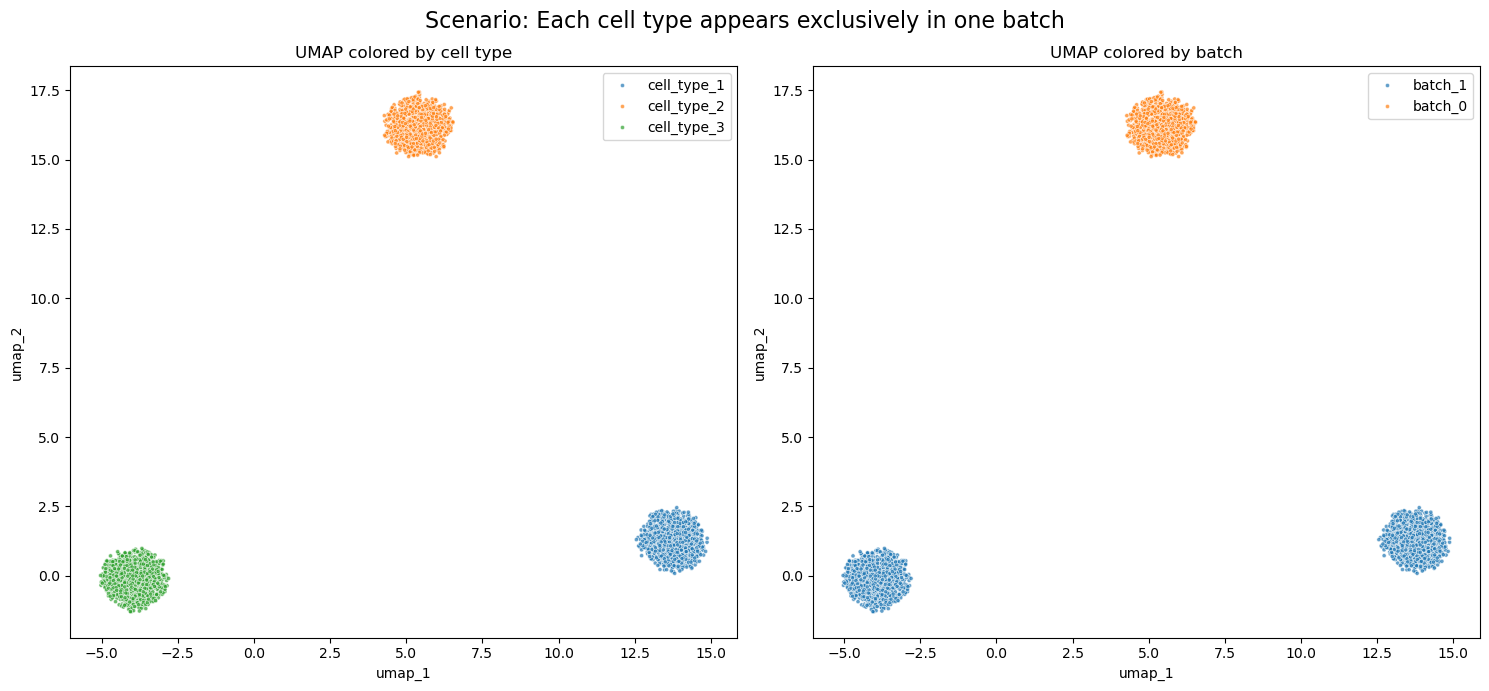

In [179]:
fig, axes = plot_scenario_plots(
    df=df,
    scenario_name='Each cell type appears exclusively in one batch'
)
plt.savefig(f"{results_dir}/{folder_date}_umap_scenario_03_each_celltype_exclusively_in_one_batch.png", dpi=300)
plt.show()

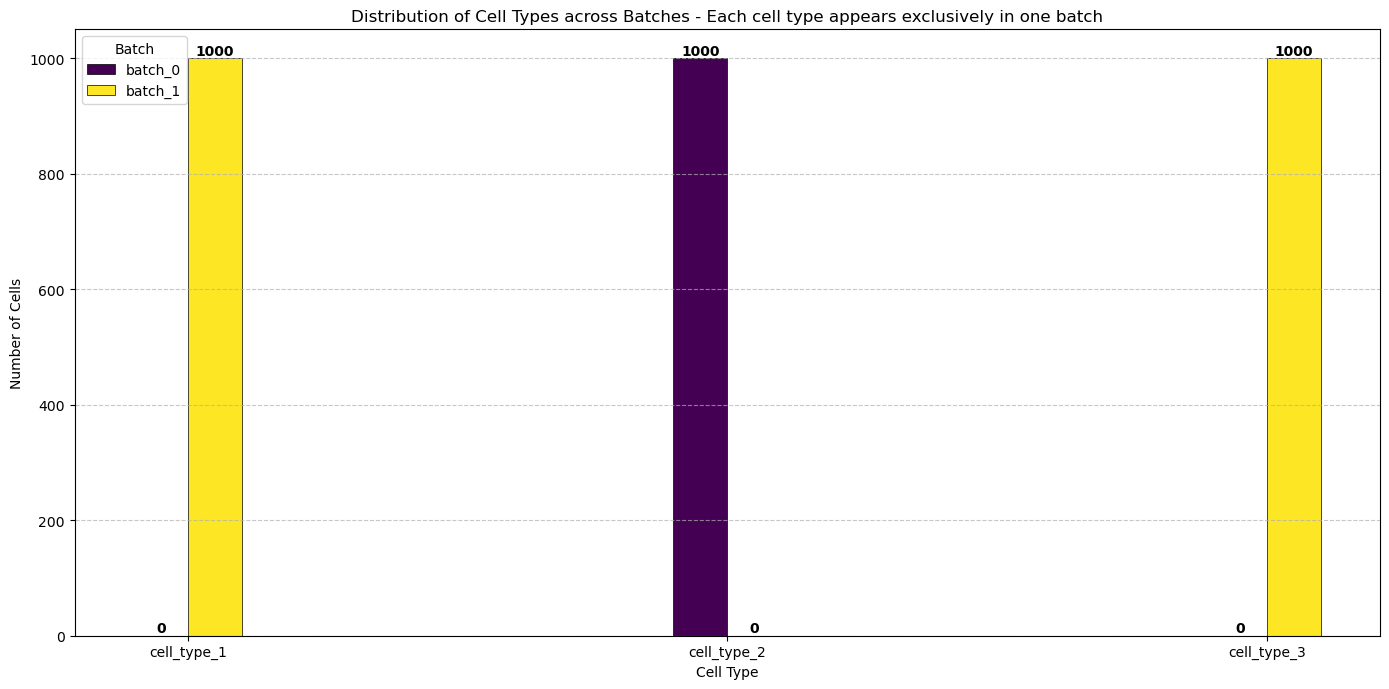

In [180]:
fig, axes = plot_cell_type_distribution(
    df=df,
    scenario_name='Each cell type appears exclusively in one batch'
)
plt.savefig(f"{results_dir}/{folder_date}_scenario_03_cell_type_distr_across_batches.png", dpi=300)
plt.show()

In [181]:
adata = convert_into_anndata(df=df)

adata

AnnData object with n_obs × n_vars = 3000 × 2000
    obs: 'cell_id', 'batch', 'cell_type', 'umap_1', 'umap_2'
    obsm: 'X_umap'

In [182]:
adata.write_h5ad(f"{results_dir}/{folder_date}_scenario_03_each_celltype_exclusively_in_one_batch.h5ad")

### Scenario 04: Partial Batch Effect

- Some cell types show batch bias while others are well-integrated

In [183]:
n_cells = 3000
n_genes = 2000
n_batches = 2
n_celltypes = 5

In [184]:
# Half of the cell types have a batch effect
batch_effect_types = set(range(1, n_celltypes + 1)[:n_celltypes // 2])
batch_effect_types

{1, 2}

In [185]:
# Create balanced cell types
cells_per_type = n_cells // n_celltypes
cells_per_type

600

In [186]:
cell_types = np.repeat(np.arange(1, n_celltypes + 1), cells_per_type)
cell_types

array([1, 1, 1, ..., 5, 5, 5])

In [187]:
# Initialize batches
batches = np.ones(n_cells)
batches

array([1., 1., 1., ..., 1., 1., 1.])

In [188]:
# For cell types with batch effect, assign batches with bias
for ct in range(1, n_celltypes + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    if ct in batch_effect_types:
        # Biased distribution: 80% of cells in batch 1, 20% in batch 2
        n_batch1 = int(len(idx) * 0.8)
        batches[idx[:n_batch1]] = 1
        batches[idx[n_batch1:]] = 2
    else:
        # Balanced distribution: 50% in batch 1, 50% in batch 2
        n_batch1 = len(idx) // 2
        batches[idx[:n_batch1]] = 1
        batches[idx[n_batch1:]] = 2
        

In [189]:
# Generate expression data
expression = np.zeros((n_cells, n_genes))
expression.shape

(3000, 2000)

In [190]:
# Generate expression profiles
for ct in range(1, n_celltypes+1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Generate base profile for this cell type
    base_profile = np.random.normal(loc=ct, scale=0.5, size=n_genes)  # n_genes points from N(ct, 0.5^2)

    # Add some noise to each cell
    for i in idx:
        noise = np.random.normal(loc=0, scale=0.2, size=n_genes)  # n_genes points from N(0, 0.2^2)
        expression[i] = base_profile + noise
        

In [191]:
# Add batch effect (shift gene expression)
for b in range(1, n_batches+1):
    batch_idx = np.where(batches == b)[0]
    batch_effect = np.random.normal(loc=b*0.5, scale=0.3, size=n_genes) # n_genes points from N(b*0.5, 0.3^2)
    expression[batch_idx] += batch_effect 

In [192]:
# Create a DataFrame for the expression data
df = pd.DataFrame({
    'cell_id': [f'cell_{i}' for i in range(n_cells)],
    'batch': [f'batch_{int(b)}' for b in batches],
    'cell_type': [f'cell_type_{ct}' for ct in cell_types]
})

df

cell_id    batch    cell_type
0        cell_0  batch_1  cell_type_1
1        cell_1  batch_1  cell_type_1
2        cell_2  batch_1  cell_type_1
3        cell_3  batch_1  cell_type_1
4        cell_4  batch_1  cell_type_1
...         ...      ...          ...
2995  cell_2995  batch_2  cell_type_5
2996  cell_2996  batch_2  cell_type_5
2997  cell_2997  batch_2  cell_type_5
2998  cell_2998  batch_2  cell_type_5
2999  cell_2999  batch_2  cell_type_5

[3000 rows x 3 columns]

In [193]:
# Add expression data to the DataFrame
for i in range(n_genes):
    df[f'gene_{i}'] = expression[:, i]

/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [194]:
df

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  1.275401  1.674422  2.189754  0.834657   
1        cell_1  batch_1  cell_type_1  1.355430  2.158354  1.690094  0.764881   
2        cell_2  batch_1  cell_type_1  1.316325  2.017932  2.304337  0.399840   
3        cell_3  batch_1  cell_type_1  1.066852  2.093619  1.846030  0.945753   
4        cell_4  batch_1  cell_type_1  1.089286  1.747102  2.285450  0.405829   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_2  cell_type_5  5.597774  6.665808  6.533764  5.521072   
2996  cell_2996  batch_2  cell_type_5  5.766740  6.151166  7.037289  5.581351   
2997  cell_2997  batch_2  cell_type_5  5.858966  6.415179  6.762801  5.753346   
2998  cell_2998  batch_2  cell_type_5  5.910091  6.250433  6.503671  5.799883   
2999  cell_2999  batch_2  cell_type_5  5.882196  6.362390  7.005009  5.732334   

        gene_4    gene_5    gene_6  ...  gene_1990  gene_1991  gene_1992  \
0     3.294860  0.991825  1.310795  ...   1.800845   1.385018   0.601947   
1     3.243938  1.294560  1.605948  ...   1.680625   1.192025   0.439698   
2     2.817366  1.005522  1.586456  ...   1.290093   1.395459   0.534619   
3     3.123466  1.116567  1.831943  ...   1.830626   1.420098   0.844843   
4     3.106806  0.822010  1.484275  ...   1.856319   1.536211   0.613463   
...        ...       ...       ...  ...        ...        ...        ...   
2995  6.016106  5.355307  6.202526  ...   6.425438   6.574835   6.015267   
2996  6.163262  5.755476  6.105747  ...   6.741986   6.401448   6.224208   
2997  6.161552  5.644126  5.778933  ...   6.463799   6.683472   5.710126   
2998  6.250693  5.860559  5.896206  ...   6.655783   6.581701   6.146193   
2999  6.176815  5.507640  5.876357  ...   6.473613   6.575807   6.193510   

      gene_1993  gene_1994  gene_1995  gene_1996  gene_1997  gene_1998  \
0      0.915772   1.098099   1.715967   1.370923   1.885752   1.462212   
1      0.839493   0.938774   1.421459   1.368086   1.321641   1.401650   
2      0.926713   1.330244   1.457604   0.748797   1.790335   1.564127   
3      0.431247   1.024664   1.793615   1.413800   1.620956   1.274216   
4      0.775601   0.953991   1.566522   1.064359   2.076671   1.233686   
...         ...        ...        ...        ...        ...        ...   
2995   6.591923   6.929674   5.794599   4.679887   6.068706   6.449067   
2996   6.550547   6.671853   5.925960   4.937539   6.241233   6.312799   
2997   7.044556   6.645282   5.807252   4.865125   6.056981   6.523029   
2998   6.879759   6.690017   5.707924   4.502969   5.801663   6.442206   
2999   6.634614   6.651500   5.826652   4.500273   6.148684   6.709067   

      gene_1999  
0      1.429929  
1      1.566697  
2      1.587201  
3      1.128714  
4      1.658738  
...         ...  
2995   6.111601  
2996   5.866950  
2997   5.872605  
2998   6.067670  
2999   6.062584  

[3000 rows x 2003 columns]

In [195]:
# Calculate UMAP embedding
embedding = calculate_umap_embedding(df, n_genes=n_genes)

# Add embedding to DataFrame
df['umap_1'] = embedding[:, 0]
df['umap_2'] = embedding[:, 1]

df

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/tmp/ipykernel_247339/3387396893.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['umap_1'] = embedding[:, 0]
/tmp/ipykernel_247339/3387396893.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  1.275401  1.674422  2.189754  0.834657   
1        cell_1  batch_1  cell_type_1  1.355430  2.158354  1.690094  0.764881   
2        cell_2  batch_1  cell_type_1  1.316325  2.017932  2.304337  0.399840   
3        cell_3  batch_1  cell_type_1  1.066852  2.093619  1.846030  0.945753   
4        cell_4  batch_1  cell_type_1  1.089286  1.747102  2.285450  0.405829   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_2  cell_type_5  5.597774  6.665808  6.533764  5.521072   
2996  cell_2996  batch_2  cell_type_5  5.766740  6.151166  7.037289  5.581351   
2997  cell_2997  batch_2  cell_type_5  5.858966  6.415179  6.762801  5.753346   
2998  cell_2998  batch_2  cell_type_5  5.910091  6.250433  6.503671  5.799883   
2999  cell_2999  batch_2  cell_type_5  5.882196  6.362390  7.005009  5.732334   

        gene_4    gene_5    gene_6  ...  gene_1992  gene_1993  gene_1994  \
0     3.294860  0.991825  1.310795  ...   0.601947   0.915772   1.098099   
1     3.243938  1.294560  1.605948  ...   0.439698   0.839493   0.938774   
2     2.817366  1.005522  1.586456  ...   0.534619   0.926713   1.330244   
3     3.123466  1.116567  1.831943  ...   0.844843   0.431247   1.024664   
4     3.106806  0.822010  1.484275  ...   0.613463   0.775601   0.953991   
...        ...       ...       ...  ...        ...        ...        ...   
2995  6.016106  5.355307  6.202526  ...   6.015267   6.591923   6.929674   
2996  6.163262  5.755476  6.105747  ...   6.224208   6.550547   6.671853   
2997  6.161552  5.644126  5.778933  ...   5.710126   7.044556   6.645282   
2998  6.250693  5.860559  5.896206  ...   6.146193   6.879759   6.690017   
2999  6.176815  5.507640  5.876357  ...   6.193510   6.634614   6.651500   

      gene_1995  gene_1996  gene_1997  gene_1998  gene_1999     umap_1  \
0      1.715967   1.370923   1.885752   1.462212   1.429929  18.778439   
1      1.421459   1.368086   1.321641   1.401650   1.566697  18.484364   
2      1.457604   0.748797   1.790335   1.564127   1.587201  18.673597   
3      1.793615   1.413800   1.620956   1.274216   1.128714  18.628412   
4      1.566522   1.064359   2.076671   1.233686   1.658738  18.338560   
...         ...        ...        ...        ...        ...        ...   
2995   5.794599   4.679887   6.068706   6.449067   6.111601  15.342128   
2996   5.925960   4.937539   6.241233   6.312799   5.866950  15.967524   
2997   5.807252   4.865125   6.056981   6.523029   5.872605  16.029226   
2998   5.707924   4.502969   5.801663   6.442206   6.067670  15.793846   
2999   5.826652   4.500273   6.148684   6.709067   6.062584  15.980084   

         umap_2  
0     -0.610169  
1     -0.741975  
2     -0.740857  
3     -1.121221  
4     -0.914235  
...         ...  
2995  13.406269  
2996  13.457111  
2997  13.349125  
2998  13.216085  
2999  12.941621  

[3000 rows x 2005 columns]

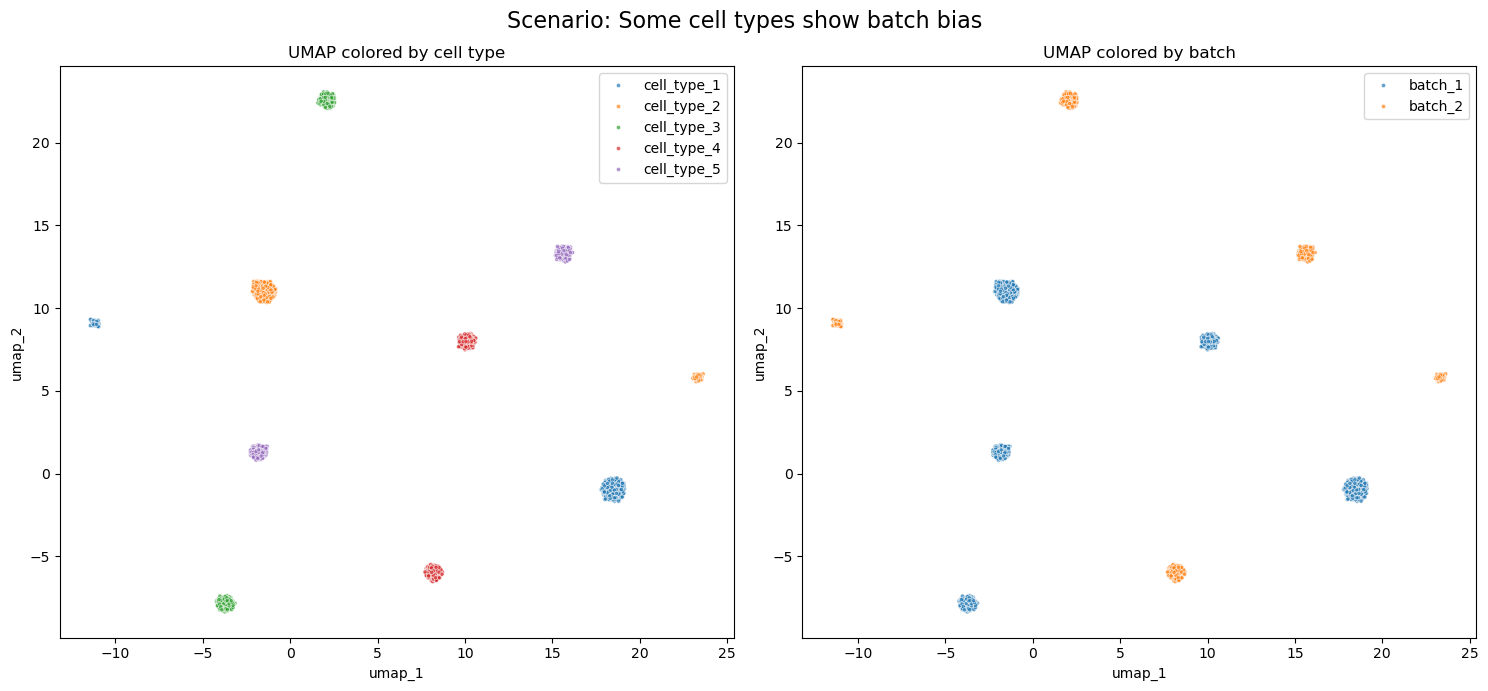

In [196]:
fig, axes = plot_scenario_plots(
    df=df,
    scenario_name='Some cell types show batch bias'
)
plt.savefig(f"{results_dir}/{folder_date}_umap_scenario_04_some_celltypes_show_batch_bias.png", dpi=300)
plt.show()

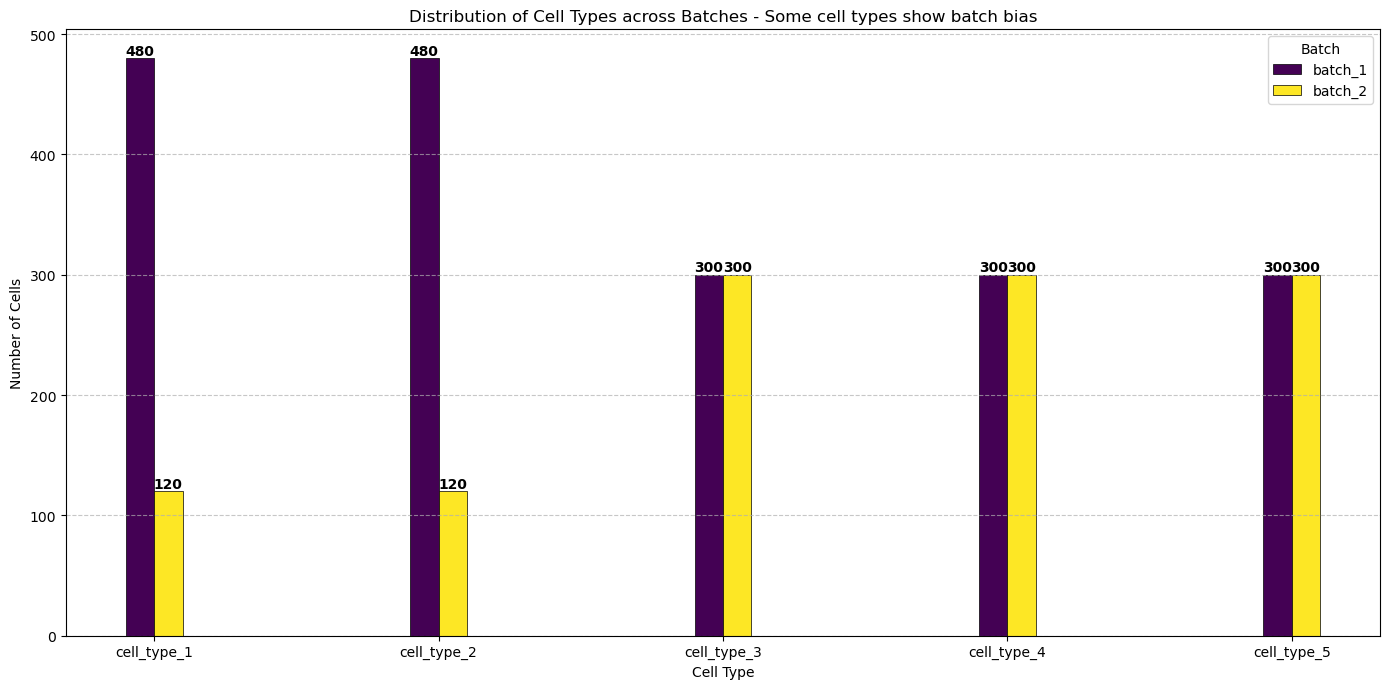

In [197]:
fig, axes = plot_cell_type_distribution(
    df=df,
    scenario_name='Some cell types show batch bias'
)
plt.savefig(f"{results_dir}/{folder_date}_scenario_04_cell_type_distr_across_batches.png", dpi=300)
plt.show()

In [198]:
adata = convert_into_anndata(df=df)

adata

AnnData object with n_obs × n_vars = 3000 × 2000
    obs: 'cell_id', 'batch', 'cell_type', 'umap_1', 'umap_2'
    obsm: 'X_umap'

In [199]:
adata.write_h5ad(f"{results_dir}/{folder_date}_scenario_04_some_celltypes_show_batch_bias.h5ad")

### Scenario 05: Rare cell type batch effect

- Commom cell types are well-integrated across batches
- Rare cell types show strong batch bias

In [9]:
n_cells = 3000
n_genes = 2000
n_batches = 2
n_common_types = 2
n_rare_types = 2
n_celltypes = n_common_types + n_rare_types

In [201]:
# Allocate cells per type (common and rare)
common_ratio = 0.90 # 90% of cells are common types
rare_ratio = 0.10   # 10% of cells are rare types

In [202]:
common_cells = int(n_cells * common_ratio)
rare_cells = n_cells - common_cells

In [203]:
# Create cell type assignments
common_cells_per_type = common_cells // n_common_types
rare_cells_per_type = rare_cells // n_rare_types

In [204]:
cell_types = np.concatenate([
    np.repeat(np.arange(1, n_common_types + 1), common_cells_per_type),
    np.repeat(np.arange(n_common_types + 1, n_celltypes + 1), rare_cells_per_type)
])

In [205]:
# Initialize batches
batches = np.ones(n_cells)

In [206]:
# For common cell types, distribute evenly across batches
for ct in range(1, n_common_types + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Assign batches evenly
    n_batch1 = len(idx) // 2
    batches[idx[:n_batch1]] = 1
    batches[idx[n_batch1:]] = 2

In [207]:
# For rare cell types, assign batches with bias
for ct in range(n_common_types + 1, n_celltypes + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Assign to batch based on cell type (alternating batches)
    primary_batch = (ct % n_batches) + 1
    secondary_batch = 3 - primary_batch  # Switch between batch 1 and 2

    # 90% in primary batch, 10% in secondary batch
    n_primary = int(len(idx) * 0.9)
    batches[idx[:n_primary]] = primary_batch
    batches[idx[n_primary:]] = secondary_batch

In [208]:
# Generate expression data
expression = np.zeros((n_cells, n_genes))
expression.shape

(3000, 2000)

In [209]:
# Generate expression profiles
for ct in range(1, n_celltypes + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Generate base profile for this cell type
    base_profile = np.random.normal(loc=ct, scale=0.5, size=n_genes)  # n_genes points from N(ct, 0.5^2)

    # Add some noise to each cell
    for i in idx:
        noise = np.random.normal(loc=0, scale=0.2, size=n_genes)  # n_genes points from N(0, 0.2^2)
        expression[i] = base_profile + noise

In [210]:
# Add batch effect (shift gene expression)
for b in range(1, n_batches + 1):
    batch_idx = np.where(batches == b)[0]
    batch_effect = np.random.normal(loc=b * 0.3, scale=0.2, size=n_genes)  # n_genes points from N(b*0.3, 0.2^2)
    expression[batch_idx] += batch_effect

In [211]:
# Create a DataFrame for the expression data
df = pd.DataFrame({
    'cell_id': [f'cell_{i}' for i in range(n_cells)],
    'batch': [f'batch_{int(b)}' for b in batches],
    'cell_type': [f'cell_type_{ct}' for ct in cell_types]
})

df

cell_id    batch    cell_type
0        cell_0  batch_1  cell_type_1
1        cell_1  batch_1  cell_type_1
2        cell_2  batch_1  cell_type_1
3        cell_3  batch_1  cell_type_1
4        cell_4  batch_1  cell_type_1
...         ...      ...          ...
2995  cell_2995  batch_2  cell_type_4
2996  cell_2996  batch_2  cell_type_4
2997  cell_2997  batch_2  cell_type_4
2998  cell_2998  batch_2  cell_type_4
2999  cell_2999  batch_2  cell_type_4

[3000 rows x 3 columns]

In [212]:
# Add expression data to the DataFrame
for i in range(n_genes):
    df[f'gene_{i}'] = expression[:, i]

/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_247339/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [213]:
df

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  1.021942  0.605972  1.429642  0.918929   
1        cell_1  batch_1  cell_type_1  0.969009  0.837783  1.762297  0.776054   
2        cell_2  batch_1  cell_type_1  1.295142  0.342324  1.543242  0.752509   
3        cell_3  batch_1  cell_type_1  0.845962  0.375370  0.997136  0.664142   
4        cell_4  batch_1  cell_type_1  1.271324  0.517996  1.582576  0.635429   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_2  cell_type_4  4.837358  4.679132  3.960267  4.818594   
2996  cell_2996  batch_2  cell_type_4  5.090983  4.740953  4.296326  4.284308   
2997  cell_2997  batch_2  cell_type_4  4.972145  4.942573  4.217364  4.141436   
2998  cell_2998  batch_2  cell_type_4  5.016364  4.803271  4.211498  4.196071   
2999  cell_2999  batch_2  cell_type_4  4.664234  4.698371  4.364748  4.292720   

        gene_4    gene_5    gene_6  ...  gene_1990  gene_1991  gene_1992  \
0     1.865290  1.308909  0.487800  ...   1.024093  -0.222701   1.800071   
1     1.791527  0.962687  0.578094  ...   1.285553   0.185631   1.557970   
2     1.566344  1.356135  0.694792  ...   1.115749   0.015758   1.696578   
3     1.506663  1.367096  1.054924  ...   0.732980  -0.238408   1.888433   
4     1.180174  1.258328  0.124698  ...   0.809245  -0.020638   1.140572   
...        ...       ...       ...  ...        ...        ...        ...   
2995  4.704543  5.252953  4.791591  ...   4.506929   4.490342   4.885991   
2996  5.208186  4.831786  4.449436  ...   4.555842   4.349240   4.814976   
2997  4.690599  5.329297  4.634873  ...   4.086009   4.719463   4.763936   
2998  4.754323  4.854499  4.454050  ...   4.415347   4.751933   4.723733   
2999  4.929746  4.761297  4.480516  ...   4.412004   4.797346   4.848529   

      gene_1993  gene_1994  gene_1995  gene_1996  gene_1997  gene_1998  \
0      1.703361   0.300289   2.190226   1.786580   2.192565   0.621547   
1      1.980110   0.349659   2.298931   1.857662   1.832257   0.502751   
2      1.513175   0.238687   2.001642   1.784434   2.233431   0.613093   
3      1.496280   0.169408   1.888160   2.307124   1.951431   0.735764   
4      1.645264   0.289949   2.169550   1.980578   1.622525   0.829071   
...         ...        ...        ...        ...        ...        ...   
2995   4.561156   5.196452   4.772352   4.785343   5.214593   3.726389   
2996   4.462232   4.976098   4.630518   4.350972   5.255428   3.762812   
2997   4.428175   4.898075   4.474010   4.194817   5.303719   3.912125   
2998   4.761293   5.032663   4.674743   4.487085   5.360963   3.845016   
2999   4.690829   4.911478   4.557175   4.708771   5.578331   3.651348   

      gene_1999  
0      1.078192  
1      1.613808  
2      1.545061  
3      1.595618  
4      1.315720  
...         ...  
2995   5.237920  
2996   5.395574  
2997   5.289660  
2998   4.935139  
2999   5.254886  

[3000 rows x 2003 columns]

In [214]:
# Calculate UMAP embedding
embedding = calculate_umap_embedding(df, n_genes=n_genes)

# Add embedding to DataFrame
df['umap_1'] = embedding[:, 0]
df['umap_2'] = embedding[:, 1]

df

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/tmp/ipykernel_247339/3387396893.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['umap_1'] = embedding[:, 0]
/tmp/ipykernel_247339/3387396893.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  1.021942  0.605972  1.429642  0.918929   
1        cell_1  batch_1  cell_type_1  0.969009  0.837783  1.762297  0.776054   
2        cell_2  batch_1  cell_type_1  1.295142  0.342324  1.543242  0.752509   
3        cell_3  batch_1  cell_type_1  0.845962  0.375370  0.997136  0.664142   
4        cell_4  batch_1  cell_type_1  1.271324  0.517996  1.582576  0.635429   
...         ...      ...          ...       ...       ...       ...       ...   
2995  cell_2995  batch_2  cell_type_4  4.837358  4.679132  3.960267  4.818594   
2996  cell_2996  batch_2  cell_type_4  5.090983  4.740953  4.296326  4.284308   
2997  cell_2997  batch_2  cell_type_4  4.972145  4.942573  4.217364  4.141436   
2998  cell_2998  batch_2  cell_type_4  5.016364  4.803271  4.211498  4.196071   
2999  cell_2999  batch_2  cell_type_4  4.664234  4.698371  4.364748  4.292720   

        gene_4    gene_5    gene_6  ...  gene_1992  gene_1993  gene_1994  \
0     1.865290  1.308909  0.487800  ...   1.800071   1.703361   0.300289   
1     1.791527  0.962687  0.578094  ...   1.557970   1.980110   0.349659   
2     1.566344  1.356135  0.694792  ...   1.696578   1.513175   0.238687   
3     1.506663  1.367096  1.054924  ...   1.888433   1.496280   0.169408   
4     1.180174  1.258328  0.124698  ...   1.140572   1.645264   0.289949   
...        ...       ...       ...  ...        ...        ...        ...   
2995  4.704543  5.252953  4.791591  ...   4.885991   4.561156   5.196452   
2996  5.208186  4.831786  4.449436  ...   4.814976   4.462232   4.976098   
2997  4.690599  5.329297  4.634873  ...   4.763936   4.428175   4.898075   
2998  4.754323  4.854499  4.454050  ...   4.723733   4.761293   5.032663   
2999  4.929746  4.761297  4.480516  ...   4.848529   4.690829   4.911478   

      gene_1995  gene_1996  gene_1997  gene_1998  gene_1999     umap_1  \
0      2.190226   1.786580   2.192565   0.621547   1.078192  -2.121023   
1      2.298931   1.857662   1.832257   0.502751   1.613808  -2.627895   
2      2.001642   1.784434   2.233431   0.613093   1.545061  -2.186408   
3      1.888160   2.307124   1.951431   0.735764   1.595618  -1.993442   
4      2.169550   1.980578   1.622525   0.829071   1.315720  -2.912928   
...         ...        ...        ...        ...        ...        ...   
2995   4.772352   4.785343   5.214593   3.726389   5.237920  17.026695   
2996   4.630518   4.350972   5.255428   3.762812   5.395574  16.997412   
2997   4.474010   4.194817   5.303719   3.912125   5.289660  17.026287   
2998   4.674743   4.487085   5.360963   3.845016   4.935139  17.027674   
2999   4.557175   4.708771   5.578331   3.651348   5.254886  17.033421   

        umap_2  
0     8.541778  
1     8.818640  
2     8.132605  
3     8.917263  
4     8.871154  
...        ...  
2995  5.570778  
2996  5.543586  
2997  5.570542  
2998  5.571887  
2999  5.577652  

[3000 rows x 2005 columns]

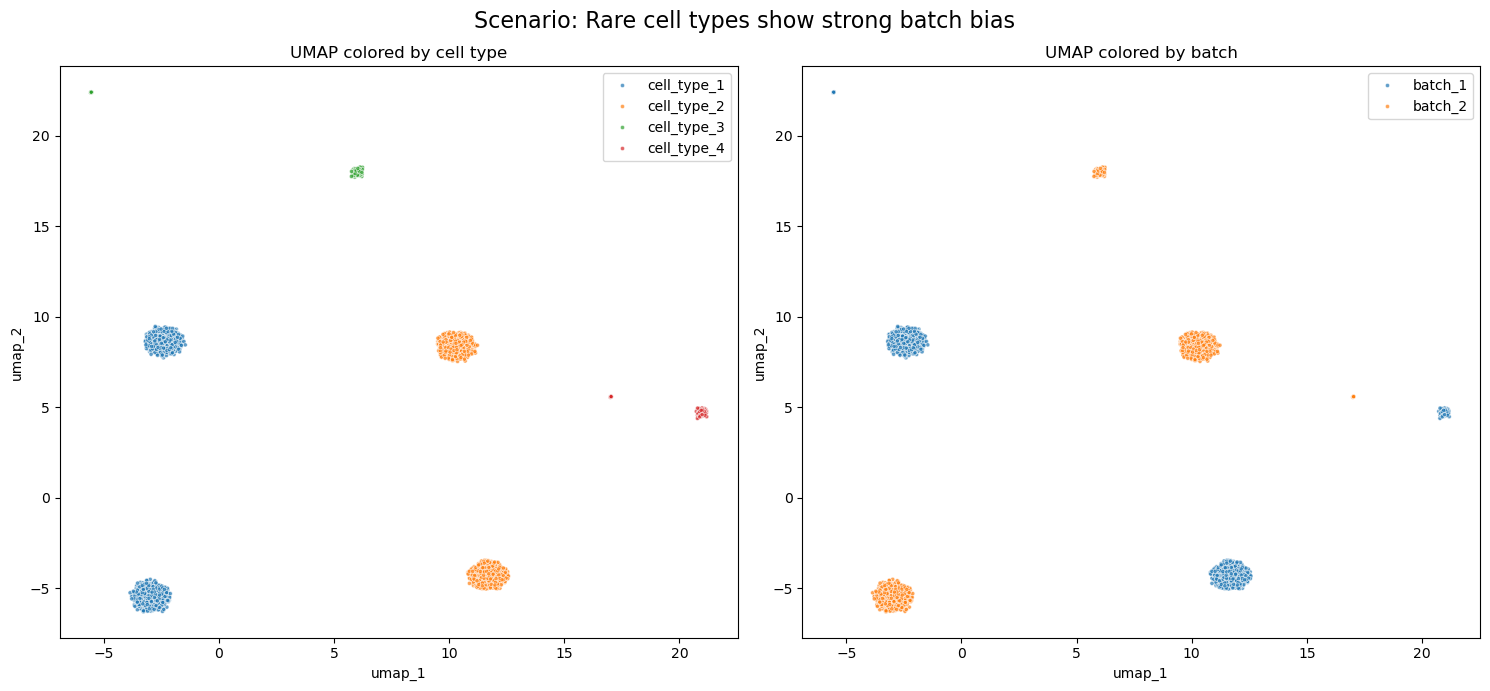

In [215]:
fig, axes = plot_scenario_plots(
    df=df,
    scenario_name='Rare cell types show strong batch bias'
)
plt.savefig(f"{results_dir}/{folder_date}_umap_scenario_05_rare_celltypes_show_strong_batch_bias.png", dpi=300)
plt.show()

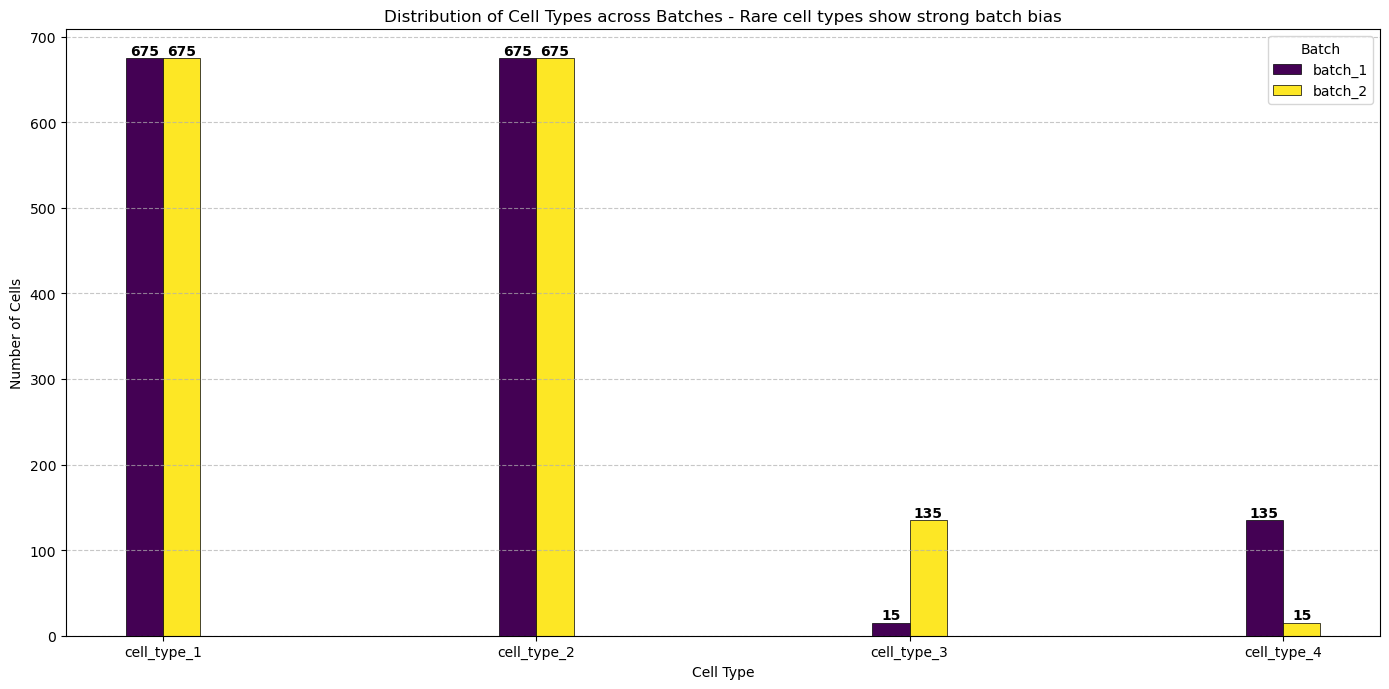

In [216]:
fig, axes = plot_cell_type_distribution(
    df=df,
    scenario_name='Rare cell types show strong batch bias'
)
plt.savefig(f"{results_dir}/{folder_date}_scenario_05_cell_type_distr_across_batches.png", dpi=300)
plt.show()

In [217]:
adata = convert_into_anndata(df=df)

adata

AnnData object with n_obs × n_vars = 3000 × 2000
    obs: 'cell_id', 'batch', 'cell_type', 'umap_1', 'umap_2'
    obsm: 'X_umap'

In [218]:
adata.write_h5ad(f"{results_dir}/{folder_date}_scenario_05_rare_celltypes_show_strong_batch_bias.h5ad")

### Scenario 05 a: Rare cell type batch effect

- Commom cell types are well-integrated across batches
- Rare cell types show strong batch bias

In [46]:
common_cells = 4 * 675
rare_cells = 2 * (100 + 135)
n_cells = common_cells + rare_cells
n_genes = 2000
n_batches = 2
n_common_types = 2
n_rare_types = 2
n_celltypes = n_common_types + n_rare_types

In [47]:
# Create cell type assignments
common_cells_per_type = common_cells // n_common_types
rare_cells_per_type = rare_cells // n_rare_types

common_cells_per_type, rare_cells_per_type

(1350, 235)

In [48]:
cell_types = np.concatenate([
    np.repeat(np.arange(1, n_common_types + 1), common_cells_per_type),
    np.repeat(np.arange(n_common_types + 1, n_celltypes + 1), rare_cells_per_type)
])

cell_types

array([1, 1, 1, ..., 4, 4, 4])

In [49]:
# Initialize batches
batches = np.ones(n_cells)

In [50]:
for ct in range(1, n_common_types + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Assign batches evenly
    n_batch1 = len(idx) // 2
    batches[idx[:n_batch1]] = 1
    batches[idx[n_batch1:]] = 2

In [51]:
# For rare cell types, assign batches with bias
for ct in range(n_common_types + 1, n_celltypes + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Assign to batch based on cell type (alternating batches)
    primary_batch = (ct % n_batches) + 1
    secondary_batch = 3 - primary_batch  # Switch between batch 1 and 2

    # 135 in primary batch, 100 in secondary batch
    n_primary = 135
    batches[idx[:n_primary]] = primary_batch
    batches[idx[n_primary:]] = secondary_batch

In [52]:
# Generate expression data
expression = np.zeros((n_cells, n_genes))
expression.shape

(3170, 2000)

In [53]:
# Generate expression profiles
for ct in range(1, n_celltypes + 1):
    # Get indices for the current cell type
    idx = np.where(cell_types == ct)[0]

    # Generate base profile for this cell type
    base_profile = np.random.normal(loc=ct, scale=0.5, size=n_genes)  # n_genes points from N(ct, 0.5^2)

    # Add some noise to each cell
    for i in idx:
        noise = np.random.normal(loc=0, scale=0.2, size=n_genes)  # n_genes points from N(0, 0.2^2)
        expression[i] = base_profile + noise

In [54]:
# Add batch effect (shift gene expression)
for b in range(1, n_batches + 1):
    batch_idx = np.where(batches == b)[0]
    batch_effect = np.random.normal(loc=b * 0.3, scale=0.2, size=n_genes)  # n_genes points from N(b*0.3, 0.2^2)
    expression[batch_idx] += batch_effect

In [55]:
# Create a DataFrame for the expression data
df = pd.DataFrame({
    'cell_id': [f'cell_{i}' for i in range(n_cells)],
    'batch': [f'batch_{int(b)}' for b in batches],
    'cell_type': [f'cell_type_{ct}' for ct in cell_types]
})

df

cell_id    batch    cell_type
0        cell_0  batch_1  cell_type_1
1        cell_1  batch_1  cell_type_1
2        cell_2  batch_1  cell_type_1
3        cell_3  batch_1  cell_type_1
4        cell_4  batch_1  cell_type_1
...         ...      ...          ...
3165  cell_3165  batch_2  cell_type_4
3166  cell_3166  batch_2  cell_type_4
3167  cell_3167  batch_2  cell_type_4
3168  cell_3168  batch_2  cell_type_4
3169  cell_3169  batch_2  cell_type_4

[3170 rows x 3 columns]

In [56]:
# Add expression data to the DataFrame
for i in range(n_genes):
    df[f'gene_{i}'] = expression[:, i]

/tmp/ipykernel_187245/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_187245/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'gene_{i}'] = expression[:, i]
/tmp/ipykernel_187245/2201203194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [57]:
df

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  1.738549  1.156340  1.520999  1.951505   
1        cell_1  batch_1  cell_type_1  1.700886  1.179003  1.683086  2.107623   
2        cell_2  batch_1  cell_type_1  1.650768  1.059058  1.491071  1.903498   
3        cell_3  batch_1  cell_type_1  1.866980  1.084514  1.645008  2.156043   
4        cell_4  batch_1  cell_type_1  1.737886  1.124144  1.560007  2.035181   
...         ...      ...          ...       ...       ...       ...       ...   
3165  cell_3165  batch_2  cell_type_4  5.409941  4.262447  4.086593  4.770075   
3166  cell_3166  batch_2  cell_type_4  5.894236  4.214905  3.554755  4.637753   
3167  cell_3167  batch_2  cell_type_4  5.847524  4.704379  4.069913  4.747056   
3168  cell_3168  batch_2  cell_type_4  5.936529  4.561672  4.030735  4.695967   
3169  cell_3169  batch_2  cell_type_4  5.363062  4.712921  4.403751  4.294277   

        gene_4    gene_5    gene_6  ...  gene_1990  gene_1991  gene_1992  \
0     0.800025  1.098224  2.295658  ...   1.224348   1.707236   1.413812   
1     0.905376  1.174078  1.754539  ...   1.669738   1.862767   1.609248   
2     1.135918  1.222996  2.231185  ...   1.804030   1.796631   2.136702   
3     1.434319  1.169662  2.315762  ...   1.848909   1.839779   1.941343   
4     1.418184  0.901357  2.495581  ...   1.457680   1.511268   1.727679   
...        ...       ...       ...  ...        ...        ...        ...   
3165  5.520182  3.686346  4.985957  ...   4.453324   4.578709   4.835521   
3166  5.365458  3.336520  4.595515  ...   4.901127   4.602747   4.872524   
3167  5.248322  3.513731  4.893678  ...   4.752438   4.789533   4.254593   
3168  5.291859  3.427300  4.814967  ...   4.650764   4.768151   5.032460   
3169  5.313894  3.571821  4.880874  ...   5.149356   4.924566   4.475389   

      gene_1993  gene_1994  gene_1995  gene_1996  gene_1997  gene_1998  \
0      1.670117   1.446113   1.898698   0.777819   0.785845   1.551379   
1      1.623656   2.031835   1.927301   1.423911   0.606423   1.316293   
2      1.701501   1.717641   2.334978   1.258780   0.682879   1.553286   
3      1.220170   2.097972   2.153227   0.793712   0.708841   1.321857   
4      1.330500   1.949399   1.656768   1.178817   1.017507   1.202564   
...         ...        ...        ...        ...        ...        ...   
3165   4.364564   4.919183   5.526116   3.476489   4.059148   4.381920   
3166   4.341649   5.312586   5.468676   3.744704   3.980640   4.627301   
3167   4.171652   5.538254   5.510947   3.685932   4.033502   4.803668   
3168   4.447041   4.704489   5.096971   3.506619   4.119888   4.295897   
3169   4.467590   4.800795   5.684293   3.749849   4.316614   4.785062   

      gene_1999  
0      1.372466  
1      1.066280  
2      1.715892  
3      1.429214  
4      1.111074  
...         ...  
3165   4.051588  
3166   4.148896  
3167   4.149496  
3168   4.324391  
3169   4.570216  

[3170 rows x 2003 columns]

In [58]:
# Calculate UMAP embedding
embedding = calculate_umap_embedding(df, n_genes=n_genes)

# Add embedding to DataFrame
df['umap_1'] = embedding[:, 0]
df['umap_2'] = embedding[:, 1]

df

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/tmp/ipykernel_187245/3387396893.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['umap_1'] = embedding[:, 0]
/tmp/ipykernel_187245/3387396893.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

cell_id    batch    cell_type    gene_0    gene_1    gene_2    gene_3  \
0        cell_0  batch_1  cell_type_1  1.738549  1.156340  1.520999  1.951505   
1        cell_1  batch_1  cell_type_1  1.700886  1.179003  1.683086  2.107623   
2        cell_2  batch_1  cell_type_1  1.650768  1.059058  1.491071  1.903498   
3        cell_3  batch_1  cell_type_1  1.866980  1.084514  1.645008  2.156043   
4        cell_4  batch_1  cell_type_1  1.737886  1.124144  1.560007  2.035181   
...         ...      ...          ...       ...       ...       ...       ...   
3165  cell_3165  batch_2  cell_type_4  5.409941  4.262447  4.086593  4.770075   
3166  cell_3166  batch_2  cell_type_4  5.894236  4.214905  3.554755  4.637753   
3167  cell_3167  batch_2  cell_type_4  5.847524  4.704379  4.069913  4.747056   
3168  cell_3168  batch_2  cell_type_4  5.936529  4.561672  4.030735  4.695967   
3169  cell_3169  batch_2  cell_type_4  5.363062  4.712921  4.403751  4.294277   

        gene_4    gene_5    gene_6  ...  gene_1992  gene_1993  gene_1994  \
0     0.800025  1.098224  2.295658  ...   1.413812   1.670117   1.446113   
1     0.905376  1.174078  1.754539  ...   1.609248   1.623656   2.031835   
2     1.135918  1.222996  2.231185  ...   2.136702   1.701501   1.717641   
3     1.434319  1.169662  2.315762  ...   1.941343   1.220170   2.097972   
4     1.418184  0.901357  2.495581  ...   1.727679   1.330500   1.949399   
...        ...       ...       ...  ...        ...        ...        ...   
3165  5.520182  3.686346  4.985957  ...   4.835521   4.364564   4.919183   
3166  5.365458  3.336520  4.595515  ...   4.872524   4.341649   5.312586   
3167  5.248322  3.513731  4.893678  ...   4.254593   4.171652   5.538254   
3168  5.291859  3.427300  4.814967  ...   5.032460   4.447041   4.704489   
3169  5.313894  3.571821  4.880874  ...   4.475389   4.467590   4.800795   

      gene_1995  gene_1996  gene_1997  gene_1998  gene_1999     umap_1  \
0      1.898698   0.777819   0.785845   1.551379   1.372466  18.622128   
1      1.927301   1.423911   0.606423   1.316293   1.066280  18.234974   
2      2.334978   1.258780   0.682879   1.553286   1.715892  18.253531   
3      2.153227   0.793712   0.708841   1.321857   1.429214  17.793848   
4      1.656768   1.178817   1.017507   1.202564   1.111074  18.663141   
...         ...        ...        ...        ...        ...        ...   
3165   5.526116   3.476489   4.059148   4.381920   4.051588 -11.009995   
3166   5.468676   3.744704   3.980640   4.627301   4.148896 -11.020685   
3167   5.510947   3.685932   4.033502   4.803668   4.149496 -10.992097   
3168   5.096971   3.506619   4.119888   4.295897   4.324391 -11.161345   
3169   5.684293   3.749849   4.316614   4.785062   4.570216 -11.036238   

         umap_2  
0     -1.999798  
1     -2.176430  
2     -1.742584  
3     -2.042997  
4     -2.176026  
...         ...  
3165  17.617147  
3166  17.548632  
3167  17.814829  
3168  17.606359  
3169  17.759146  

[3170 rows x 2005 columns]

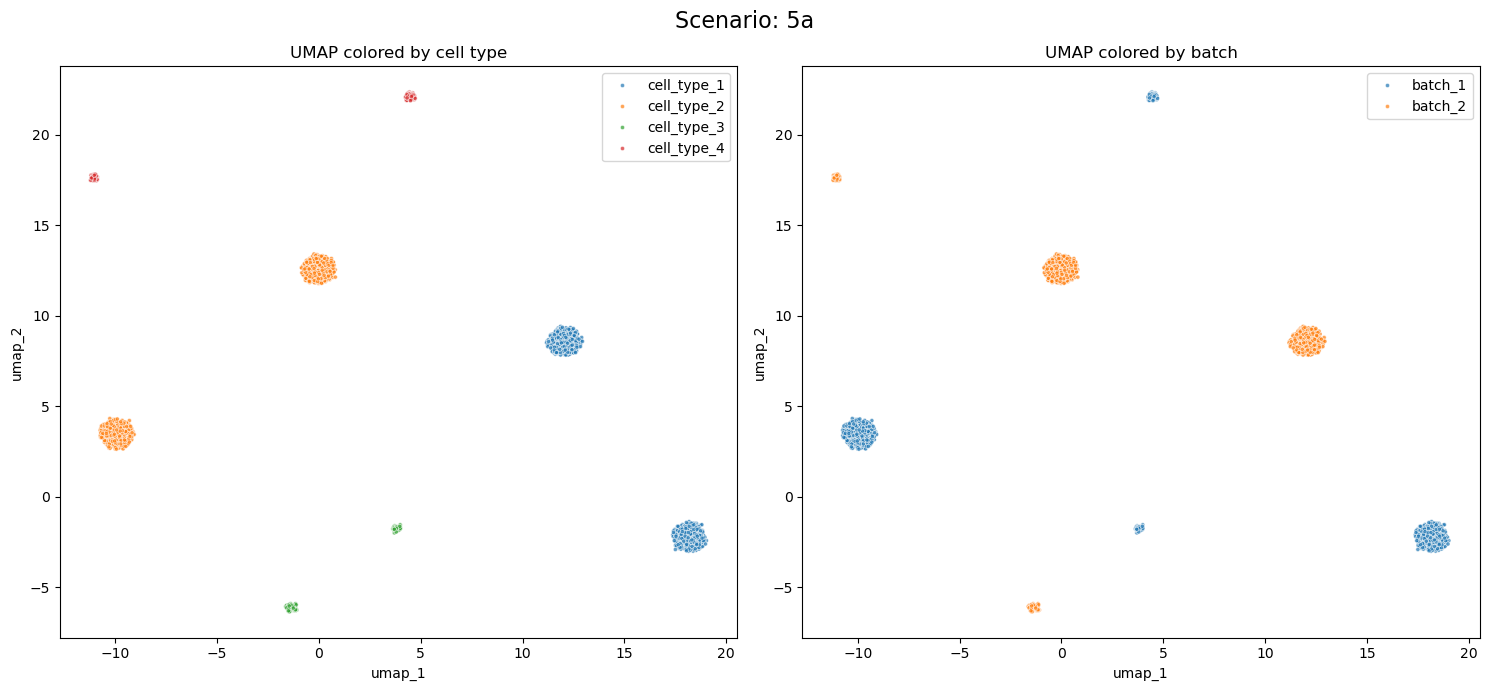

In [59]:
fig, axes = plot_scenario_plots(
    df=df,
    scenario_name='5a'
)
plt.savefig(f"{results_dir}/{folder_date}_umap_scenario_05a_rare_celltypes_show_strong_batch_bias.png", dpi=300)
plt.show()

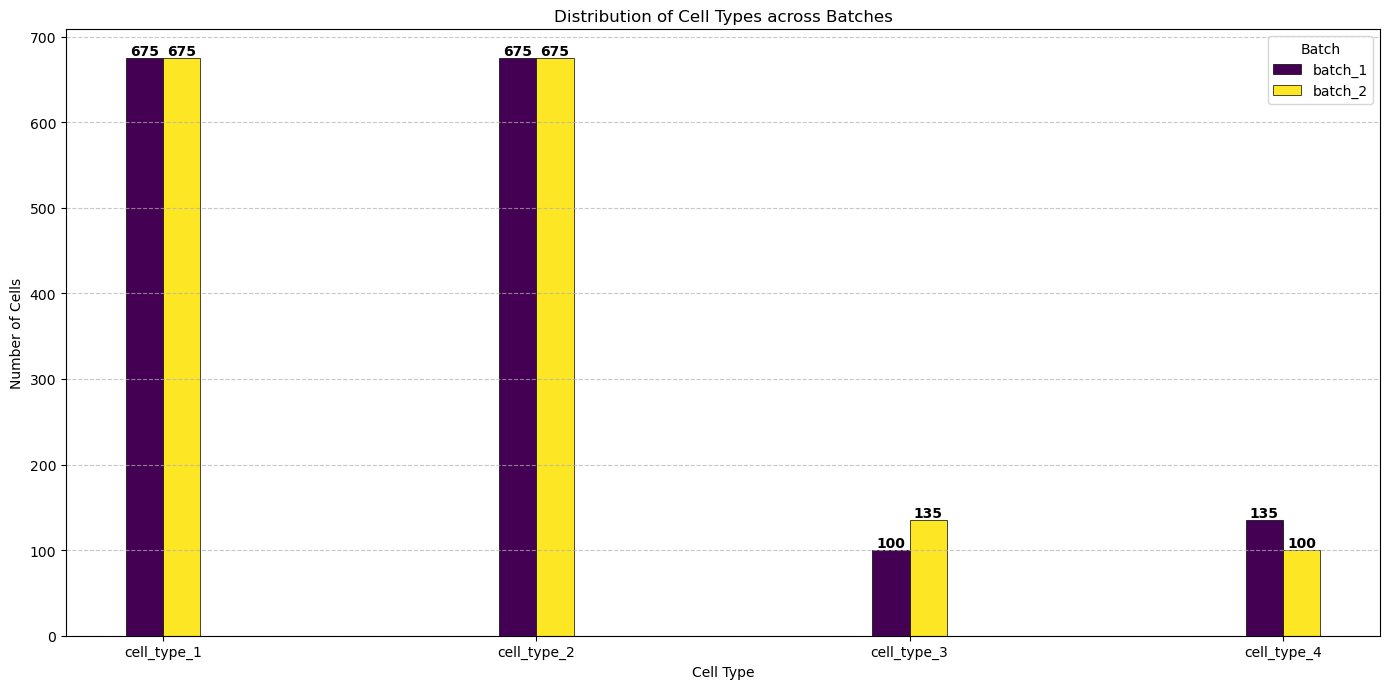

In [63]:
fig, axes = plot_cell_type_distribution(
    df=df,
    scenario_name=''
)
plt.savefig(f"{results_dir}/{folder_date}_scenario_05a_cell_type_distr_across_batches.png", dpi=300)
plt.show()

In [64]:
adata = convert_into_anndata(df=df)

adata

AnnData object with n_obs × n_vars = 3170 × 2000
    obs: 'cell_id', 'batch', 'cell_type', 'umap_1', 'umap_2'
    obsm: 'X_umap'

In [65]:
adata.write_h5ad(f"{results_dir}/{folder_date}_scenario_05a_rare_celltypes_show_strong_batch_bias.h5ad")

In [248]:
print("End of the notebook.")

End of the notebook.
